<a href="https://colab.research.google.com/github/yashrith/ModelForge/blob/master/Autoencoders.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

In [3]:
transform = transforms.ToTensor()
mnist_data = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
data_loader = torch.utils.data.DataLoader(dataset= mnist_data, batch_size=64, shuffle=True)

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 9.91M/9.91M [00:00<00:00, 104MB/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 28.9k/28.9k [00:00<00:00, 40.9MB/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 1.65M/1.65M [00:00<00:00, 63.9MB/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 4.54k/4.54k [00:00<00:00, 5.27MB/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [4]:
dataiter = iter(data_loader)
images, labels = next(dataiter)
print(torch.min(images), torch.max(images))

tensor(0.) tensor(1.)


In [5]:
labels

tensor([5, 3, 9, 9, 0, 5, 7, 2, 5, 7, 7, 3, 3, 1, 2, 5, 0, 9, 6, 8, 6, 6, 4, 0,
        4, 1, 8, 7, 1, 9, 8, 2, 0, 0, 1, 5, 1, 3, 5, 3, 6, 4, 1, 1, 5, 1, 9, 9,
        7, 6, 8, 9, 9, 4, 6, 8, 2, 4, 8, 2, 9, 8, 6, 8])

In [6]:
class Autoencoder(nn.Module):
    def __init__(self):
        super().__init__()
        self.encoder = nn.Sequential(
            nn.Linear(28*28, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 12),
            nn.ReLU(),
            nn.Linear(12, 3)
        )
        self.decoder = nn.Sequential(
            nn.Linear(3, 12),
            nn.ReLU(),
            nn.Linear(12, 64),
            nn.ReLU(),
            nn.Linear(64, 128),
            nn.ReLU(),
            nn.Linear(128, 28*28),
            nn.Sigmoid()
        )

    def forward(self, x):
      encoded = self.encoder(x)
      decoded = self.decoder(encoded)
      return decoded

# Note if input from [-1, 1] apply nn.Tanh


In [7]:
class Autoencoder_v2(nn.Module):
    def __init__(self):
        super().__init__()
        self.encoder = nn.Sequential(
            nn.Conv2d(1, 16, 3, stride=2, padding=1),
            nn.ReLU(),
            nn.Conv2d(16, 32, 3, stride=2, padding=1 ),
            nn.ReLU(),
            nn.Conv2d(32, 64, 7)
        )
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(64, 32, 7),
            nn.ReLU(),
            nn.ConvTranspose2d(32, 16, 3, stride=2, padding=1, output_padding=1),
            nn.ReLU(),
            nn.ConvTranspose2d(16, 1, 3, stride=2, padding=1, output_padding=1),
            nn.Sigmoid()
        )

    def forward(self, x):
      encoded = self.encoder(x)
      decoded = self.decoder(encoded)
      return decoded


In [8]:
model = Autoencoder()
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3, weight_decay=1e-5)

In [10]:
num_epochs=30
outputs_linear = []
for epoch in range(num_epochs):
  for(img, _) in data_loader:
    img = img.reshape(-1, 28*28)
    recon = model(img)
    loss = criterion(recon, img)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
  print(f'epoch: {epoch+1}, Loss: {loss.item():.4f}')
  outputs_linear.append((epoch, img, recon))

epoch: 1, Loss: 0.0479
epoch: 2, Loss: 0.0431
epoch: 3, Loss: 0.0374
epoch: 4, Loss: 0.0415
epoch: 5, Loss: 0.0424
epoch: 6, Loss: 0.0339
epoch: 7, Loss: 0.0342
epoch: 8, Loss: 0.0345
epoch: 9, Loss: 0.0327
epoch: 10, Loss: 0.0362
epoch: 11, Loss: 0.0315
epoch: 12, Loss: 0.0366
epoch: 13, Loss: 0.0402
epoch: 14, Loss: 0.0426
epoch: 15, Loss: 0.0374
epoch: 16, Loss: 0.0338
epoch: 17, Loss: 0.0316
epoch: 18, Loss: 0.0307
epoch: 19, Loss: 0.0293
epoch: 20, Loss: 0.0325
epoch: 21, Loss: 0.0321
epoch: 22, Loss: 0.0373
epoch: 23, Loss: 0.0333
epoch: 24, Loss: 0.0345
epoch: 25, Loss: 0.0358
epoch: 26, Loss: 0.0353
epoch: 27, Loss: 0.0354
epoch: 28, Loss: 0.0341
epoch: 29, Loss: 0.0250
epoch: 30, Loss: 0.0296


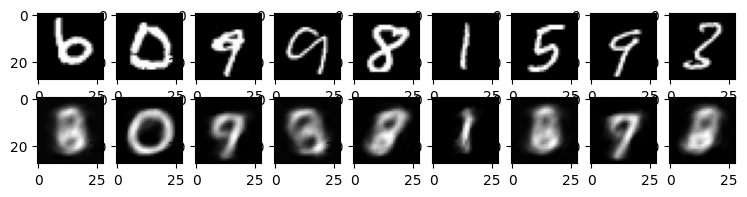

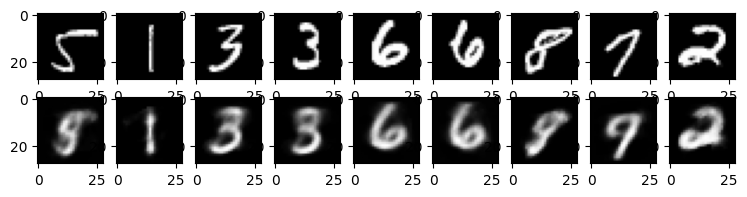

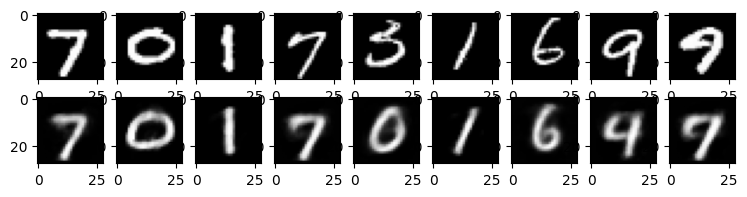

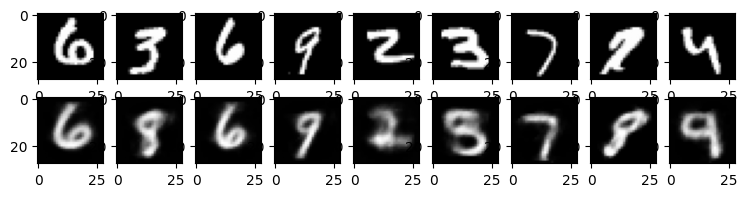

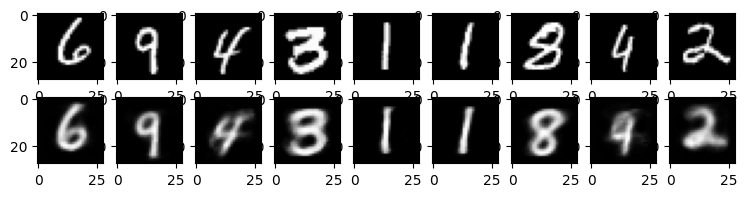

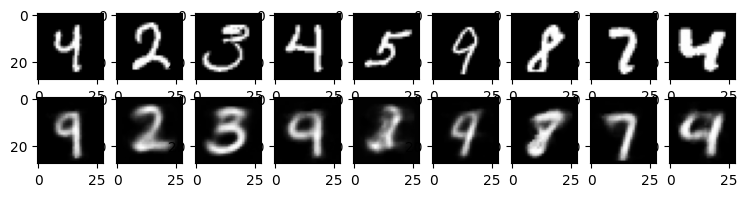

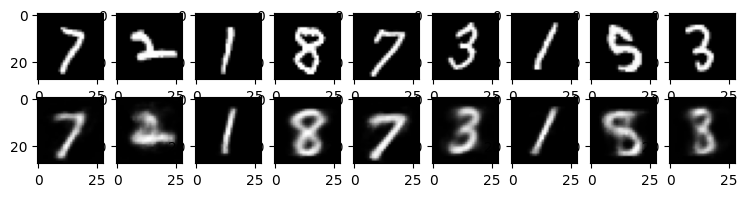

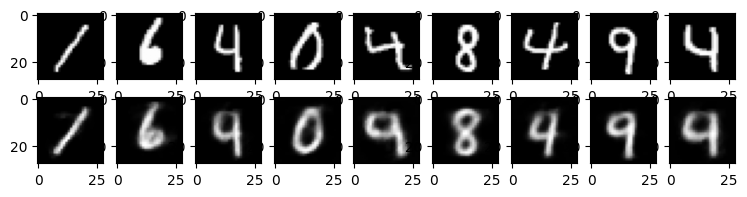

In [14]:
for k in range (0, num_epochs, 4):
  plt.figure(figsize=(9,2))
  plt.gray()
  imgs = outputs_linear[k][1].detach().numpy()
  recon = outputs_linear[k][2].detach().numpy()
  for i, item in enumerate(imgs):
    if i >= 9:
      break
    plt.subplot(2, 9, i+1)
    item = item.reshape(-1,28,28)
    plt.imshow(item[0])

  for i, item in enumerate(recon):
    if i >= 9:
      break
    plt.subplot(2, 9, 9+i+1)
    item = item.reshape(-1,28,28)
    plt.imshow(item[0])

In [15]:
# for conv
model_v2 = Autoencoder_v2()
optimizer = torch.optim.Adam(model_v2.parameters(), lr=1e-3, weight_decay=1e-5)
num_epochs=25
outputs_conv = []
for epoch in range(num_epochs):
  for(img, _) in data_loader:
    recon = model_v2(img)
    loss = criterion(recon, img)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
  print(f'epoch: {epoch+1}, Loss: {loss.item():.4f}')
  outputs_conv.append((epoch, img, recon))

epoch: 1, Loss: 0.0083
epoch: 2, Loss: 0.0068
epoch: 3, Loss: 0.0049
epoch: 4, Loss: 0.0035
epoch: 5, Loss: 0.0033
epoch: 6, Loss: 0.0030
epoch: 7, Loss: 0.0026
epoch: 8, Loss: 0.0026
epoch: 9, Loss: 0.0027
epoch: 10, Loss: 0.0027
epoch: 11, Loss: 0.0030
epoch: 12, Loss: 0.0037
epoch: 13, Loss: 0.0026
epoch: 14, Loss: 0.0026
epoch: 15, Loss: 0.0036
epoch: 16, Loss: 0.0028
epoch: 17, Loss: 0.0027
epoch: 18, Loss: 0.0026
epoch: 19, Loss: 0.0028
epoch: 20, Loss: 0.0032
epoch: 21, Loss: 0.0024
epoch: 22, Loss: 0.0031
epoch: 23, Loss: 0.0027
epoch: 24, Loss: 0.0023
epoch: 25, Loss: 0.0024


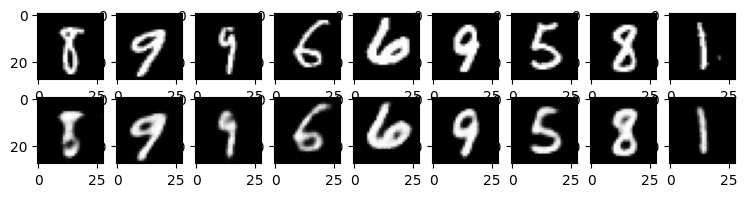

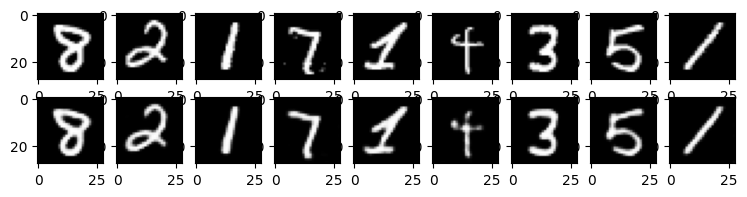

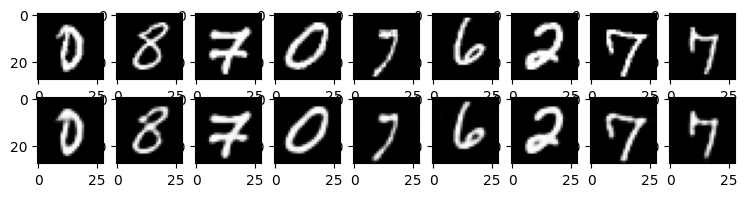

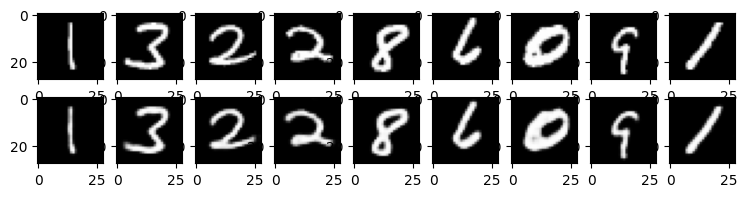

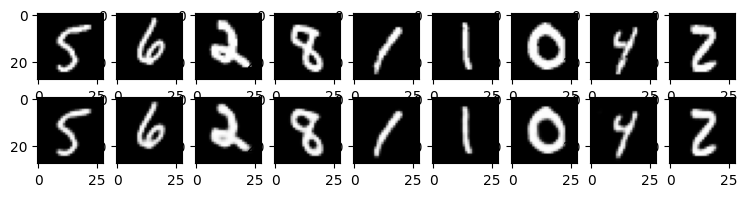

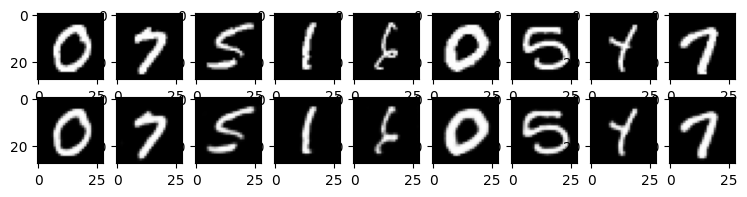

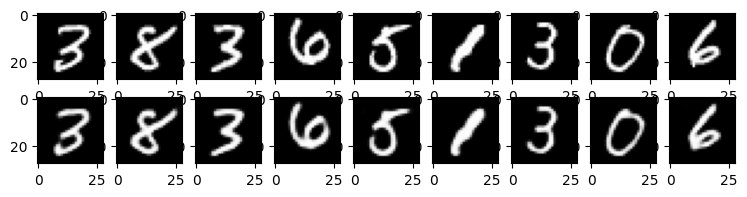

In [16]:
for k in range (0, num_epochs, 4):
  plt.figure(figsize=(9,2))
  plt.gray()
  imgs = outputs_conv[k][1].detach().numpy()
  recon = outputs_conv[k][2].detach().numpy()
  for i, item in enumerate(imgs):
    if i >= 9:
      break
    plt.subplot(2, 9, i+1)
    item = item.reshape(-1,28,28)
    plt.imshow(item[0])

  for i, item in enumerate(recon):
    if i >= 9:
      break
    plt.subplot(2, 9, 9+i+1)
    item = item.reshape(-1,28,28)
    plt.imshow(item[0])

In [18]:
model_v2.eval()  # Set model to evaluation mode.
with torch.no_grad():
    # Get one batch of training images.
    sample_images, _ = next(iter(data_loader))  # sample_images: [batch_size, 784]

    reconstructed_images = model_v2(sample_images)   # reconstructed_images: [batch_size, 784]

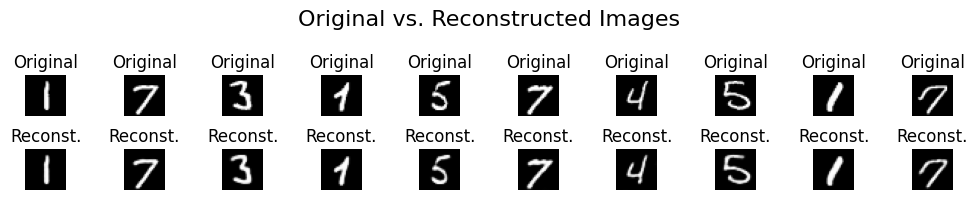

In [40]:
# Reshape images back to 28x28 for visualization.
sample_images = sample_images.cpu().view(-1, 28, 28)
reconstructed_images = reconstructed_images.cpu().view(-1, 28, 28)

fig, axes = plt.subplots(2, 10, figsize=(10, 2))
fig.suptitle("Original vs. Reconstructed Images", fontsize=16)
for i in range(10):
    axes[0, i].imshow(sample_images[i], cmap='gray')
    axes[0, i].axis('off')
    axes[0, i].set_title("Original")
    axes[1, i].imshow(reconstructed_images[i], cmap='gray')
    axes[1, i].axis('off')
    axes[1, i].set_title("Reconst.")
plt.tight_layout()
plt.show()

In [20]:
mnist_test = datasets.MNIST(root='./data', train=False, download=True, transform=transform)
data_loader_test = torch.utils.data.DataLoader(dataset= mnist_test, batch_size=64, shuffle=True)

In [22]:
mnist_images = mnist_test.data.float() / 255.0
mnist_images = mnist_images.view(-1, 784)

In [23]:
with torch.no_grad():
    reconstructed_mnist = model(mnist_images)
    # Compute mean squared error for each image.
    mnist_errors = torch.mean((mnist_images - reconstructed_mnist) ** 2, dim=1)

In [24]:
# Rank test images by reconstruction error (largest errors may indicate anomalies).
mnist_sorted_indices = torch.argsort(mnist_errors, descending=True)
top10_indices = mnist_sorted_indices[:10]
mnist_top_images = mnist_images[top10_indices].view(-1, 28, 28)
mnist_top_recons = reconstructed_mnist[top10_indices].view(-1, 28, 28)
mnist_top_errors = mnist_errors[top10_indices].numpy()

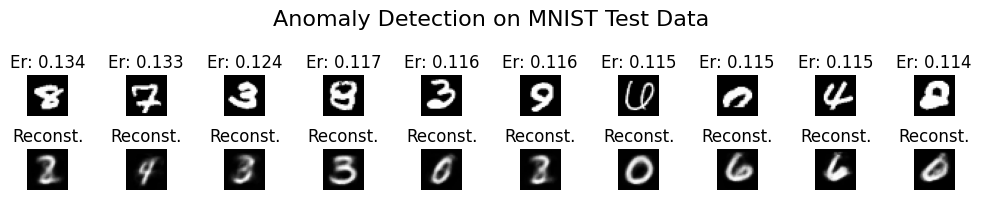

In [25]:
# Display the top 10 images with the highest reconstruction error.
fig, axes = plt.subplots(2, 10, figsize=(10, 2))
fig.suptitle("Anomaly Detection on MNIST Test Data", fontsize=16)
for i in range(10):
    axes[0, i].imshow(mnist_top_images[i], cmap='gray')
    axes[0, i].axis('off')
    axes[0, i].set_title(f"Er: {mnist_top_errors[i]:.3f}")
    axes[1, i].imshow(mnist_top_recons[i], cmap='gray')
    axes[1, i].axis('off')
    axes[1, i].set_title("Reconst.")
plt.tight_layout()
plt.show()

In [111]:
# ---------------------------
# Denoising Autoencoder Experiment
# ---------------------------
# Add Gaussian noise to the sample images.
noisy_images = sample_images + 0.35 * torch.randn_like(sample_images)
noisy_images = torch.clip(noisy_images, 0., 1.)  # Ensure pixel values are in [0, 1].

In [112]:
# Ensure correct shape before feeding into convolutional model
noisy_images = noisy_images.view(-1, 1, 28, 28)

with torch.no_grad():
    denoised_outputs = model_v2(noisy_images)


In [113]:
# Reshape denoised outputs for visualization.
denoised_outputs = denoised_outputs.view(-1, 28, 28)

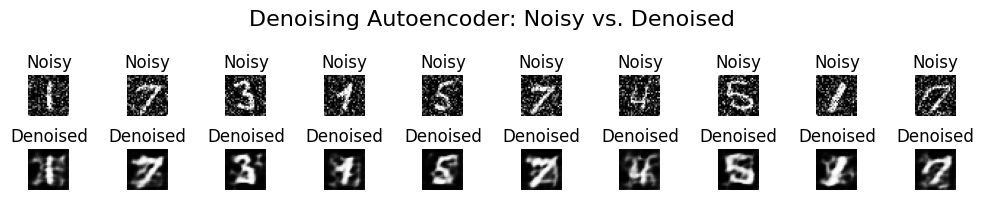

In [114]:
# Display Noisy vs. Denoised Images.
fig, axes = plt.subplots(2, 10, figsize=(10,2))
fig.suptitle("Denoising Autoencoder: Noisy vs. Denoised", fontsize=16)

for i in range(10):
    # Plot noisy images (remove channel dimension)
    axes[0, i].imshow(noisy_images[i].squeeze().cpu().numpy(), cmap='gray')
    axes[0, i].axis('off')
    axes[0, i].set_title("Noisy")

    # Plot denoised outputs (remove channel dimension)
    axes[1, i].imshow(denoised_outputs[i].squeeze().cpu().numpy(), cmap='gray')
    axes[1, i].axis('off')
    axes[1, i].set_title("Denoised")

plt.tight_layout()
plt.show()


| Aspect                 | Fully Connected Autoencoder (`Autoencoder`) | Convolutional Autoencoder (`Autoencoder_v2`) |
|------------------------|--------------------------------------------|----------------------------------------------|
| **Layer types**        | Linear layers                               | Convolutional & Transposed Convolution layers|
| **Spatial Structure**  | Lost due to flattening                      | Maintained                                   |
| **Input Shape**        | Flattened: `(batch_size, 784)`              | Image-shaped: `(batch_size, 1, 28, 28)`      |
| **Feature Extraction** | Global, less spatially sensitive            | Localized, spatially-aware                   |
| **Parameters & Memory**| Typically higher parameters                 | Typically fewer parameters, efficient        |
| **Performance**        | Generally less effective for images         | Generally more effective for images          |
